In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import joblib
from sklearn.decomposition import PCA


In [190]:
data = pd.read_csv("Data/cleaned_data.csv")
data = data.drop("Unnamed: 0",axis=1)
data

gender  age                education  currentSmoker  cigsPerDay  BPMeds  \
0       Male   39            Higher Degree              0         0.0     0.0   
1     Female   46  High School Diploma/GED              0         0.0     0.0   
2       Male   48              High School              1        20.0     0.0   
3     Female   61                  College              1        30.0     0.0   
4     Female   46                  College              1        23.0     0.0   
...      ...  ...                      ...            ...         ...     ...   
4233    Male   50              High School              1         1.0     0.0   
4234    Male   51                  College              1        43.0     0.0   
4235  Female   48  High School Diploma/GED              1        20.0     0.0   
4236  Female   44              High School              1        15.0     0.0   
4237  Female   52  High School Diploma/GED              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol    BMI  heartRate  \
0                   0             0         0    195.0  26.97       80.0   
1                   0             0         0    250.0  28.73       95.0   
2                   0             0         0    245.0  25.34       75.0   
3                   0             1         0    225.0  28.58       65.0   
4                   0             0         0    285.0  23.10       85.0   
...               ...           ...       ...      ...    ...        ...   
4233                0             1         0    313.0  25.97       66.0   
4234                0             0         0    207.0  19.71       65.0   
4235                0             0         0    248.0  22.00       84.0   
4236                0             0         0    210.0  19.16       86.0   
4237                0             0         0    269.0  21.47       80.0   

      glucose  target    sys_dia  
0        77.0       0 -29.332996  
1        76.0       0 -11.085558  
2        70.0       0  -5.621236  
3       103.0       1  21.114484  
4        85.0       0  -1.662143  
...       ...     ...        ...  
4233     86.0       1  46.112908  
4234     68.0       0  -6.527074  
4235     86.0       0  -5.839800  
4236     78.0       0  -3.561702  
4237    107.0       0   1.084665  

[4238 rows x 15 columns]

### Problems :
1 - Convert Categorical data into numerical
    * Label Encoder > high school :1 , college : 2 , Diploma : 3
    * One Hot Encoder > 

2 - unbalanced data
     1 - UnderSampling
     2 - OverSampling
     3 - Smote
3 - Normalization , Scaling

In [124]:
# categorical = []
# numerical = []
# for col in data.columns:
#     if data[col].dtype == "O":
#         categorical.append(col)
#     else:
#         numerical.append(col)        

In [125]:
categorical = [col for col in data.columns if data[col].dtype == "O"]
categorical

['gender', 'education']

In [126]:
numerical = [col for col in data.columns if data[col].dtype != "O"]
numerical.remove("target")
numerical

['age',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'BMI',
 'heartRate',
 'glucose',
 'sys_dia']

In [127]:
X = data.drop('target', axis=1)
Y = data['target']

In [128]:
list(Y).count(0)  / len(Y) ,  list(Y).count(1)  / len(Y)

(0.8480415290231241, 0.1519584709768759)

In [168]:
x_train , x_test , y_train , y_test = train_test_split(X, Y, test_size=0.15, random_state=42, stratify=Y)

In [169]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((3602, 14), (636, 14), (3602,), (636,))

In [170]:
list(y_train).count(0)  / len(y_train) ,  list(y_train).count(1)  / len(y_train)

(0.8481399222654081, 0.1518600777345919)

In [171]:
list(y_test).count(0)  / len(y_test) ,  list(y_test).count(1)  / len(y_test)

(0.8474842767295597, 0.15251572327044025)

In [174]:
ros = RandomOverSampler(sampling_strategy='minority')

In [175]:
x_train, y_train = ros.fit_resample(x_train,y_train)

In [176]:
list(y_train).count(1) , list(y_train).count(0)

(3055, 3055)

In [177]:
pipeline = ColumnTransformer([("scaler", StandardScaler() ,numerical ),
                              # [red , green , blue ] > [1 , 0, 0 ] 
                               ("encoder", OneHotEncoder() , categorical)
                             ])

In [178]:
# [high school , college , ss] > [ 1 , 0 , 0]
# [college] > [1]

In [179]:
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test) 

In [180]:
joblib.dump(pipeline, "pipeline.joblib")

['pipeline.joblib']

In [181]:
x_train

array([[-1.32160003,  0.99022778,  0.81721701, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18115125, -1.00986866, -0.78058012, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.64353626,  0.99022778,  0.41776773, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.33711377, -1.00986866, -0.78058012, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.68390252, -1.00986866, -0.78058012, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06555499,  0.99022778,  1.61611557, ...,  1.        ,
         0.        ,  0.        ]])

In [191]:
models = {"random_forest":RandomForestClassifier(), "tree":DecisionTreeClassifier(),
          "XGB" : XGBClassifier(), "Logistic":LogisticRegression(),"SVM":SVC()}

In [192]:
from sklearn.metrics import accuracy_score





 random_forest
Training Accuracy is 1.0
Accuracy Score is 0.8286163522012578
Training F1 Score is 1.0
Testing F1 Score is 0.06837606837606838
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       539
           1       0.20      0.04      0.07        97

    accuracy                           0.83       636
   macro avg       0.52      0.51      0.49       636
weighted avg       0.75      0.83      0.78       636



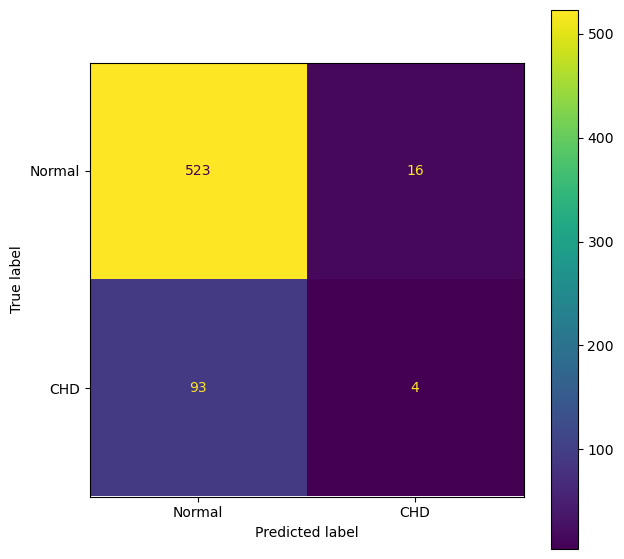





 tree
Training Accuracy is 1.0
Accuracy Score is 0.7515723270440252
Training F1 Score is 1.0
Testing F1 Score is 0.18556701030927836
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       539
           1       0.19      0.19      0.19        97

    accuracy                           0.75       636
   macro avg       0.52      0.52      0.52       636
weighted avg       0.75      0.75      0.75       636



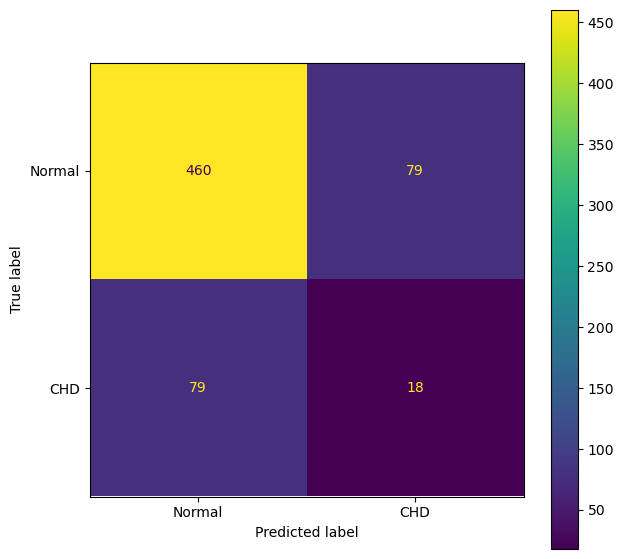





 XGB
Training Accuracy is 0.995417348608838
Accuracy Score is 0.7877358490566038
Training F1 Score is 0.9954248366013072
Testing F1 Score is 0.20118343195266272
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       539
           1       0.24      0.18      0.20        97

    accuracy                           0.79       636
   macro avg       0.55      0.54      0.54       636
weighted avg       0.76      0.79      0.77       636



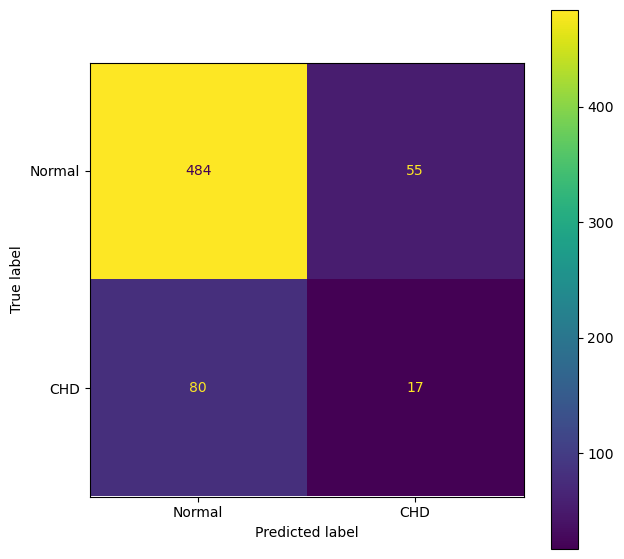





 Logistic
Training Accuracy is 0.6864157119476268
Accuracy Score is 0.6729559748427673
Training F1 Score is 0.6875407697325505
Testing F1 Score is 0.35802469135802467
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       539
           1       0.26      0.60      0.36        97

    accuracy                           0.67       636
   macro avg       0.58      0.64      0.57       636
weighted avg       0.81      0.67      0.72       636



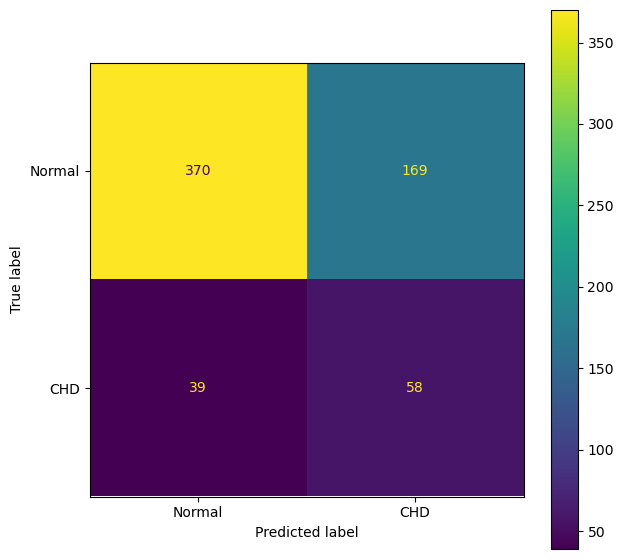





 SVM
Training Accuracy is 0.7553191489361702
Accuracy Score is 0.690251572327044
Training F1 Score is 0.7526881720430109
Testing F1 Score is 0.30388692579505294
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       539
           1       0.23      0.44      0.30        97

    accuracy                           0.69       636
   macro avg       0.56      0.59      0.55       636
weighted avg       0.78      0.69      0.73       636



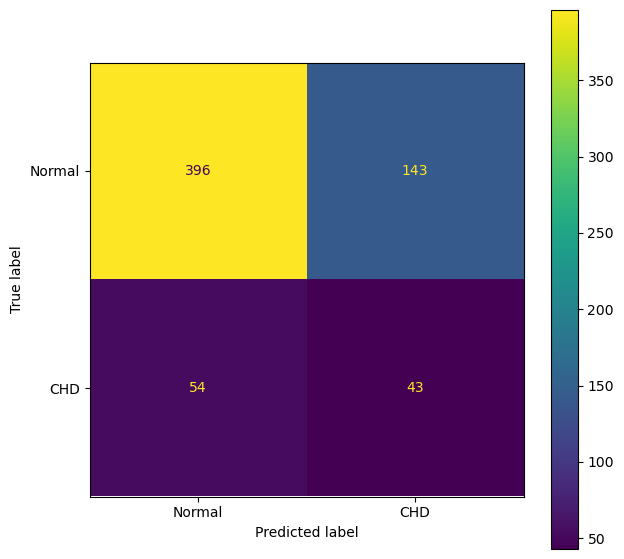

In [193]:
for name, model in models.items():
    print("\n\n\n\n",name)
    model.fit(x_train, y_train)
    
    print(F"Training Accuracy is {model.score(x_train, y_train)}")
    y_pred = model.predict(x_test)
    print(f"Accuracy Score is {accuracy_score(y_pred, y_test)}")
    y_pred_train = model.predict(x_train)
    
    print(f"Training F1 Score is {f1_score(y_pred_train, y_train)}")

    print(f"Testing F1 Score is {f1_score(y_pred, y_test)}")
    print(classification_report(y_test, y_pred))  
    # specify axis with  figure size 
    fig,ax = plt.subplots(figsize=(7,7))
    # getting confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    # confusionMatraxDisplay is used to create a confusion matrix plot from confusion
    display_con = ConfusionMatrixDisplay(confusion,display_labels=['Normal',"CHD"])
    # the confusion matrix with respect to axis defined above
    display_con.plot(ax=ax)
    plt.show()

In [194]:
import optuna

In [195]:
def objective(trail):
    
    subsample= trail.suggest_float("subsample", 0.5,1)
    n_estimators = trail.suggest_int("n_estimators", 50,500)
    max_depth = trail.suggest_int("max_depth", 3,10)
    learning_rate = trail.suggest_float("learning_rate", 0.01,0.3)
    colsample_bytree = trail.suggest_float("colsample_bytree", 0.5,1)
    min_child_weight = trail.suggest_int("min_child_weight",1,5)
    gamma = trail.suggest_float("gamma", 0,5)trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])

    
    model = XGBClassifier(subsample=subsample, n_estimators=n_estimators,max_depth = max_depth,
                         learning_rate=learning_rate,colsample_bytree=colsample_bytree,
                         min_child_weight=min_child_weight,gamma=gamma)
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    

    score = f1_score(y_pred, y_test)
    
    return score
    
    
    

In [187]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the results
print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial
print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2023-12-12 14:05:48,878] A new study created in memory with name: no-name-2e32d5d3-d701-46c1-960d-dc74a3f85e77
[I 2023-12-12 14:05:51,891] Trial 0 finished with value: 0.22115384615384617 and parameters: {'C': 83389.31917532039, 'kernel': 'poly', 'degree': 5, 'gamma': 68050.1964003188}. Best is trial 0 with value: 0.22115384615384617.
[I 2023-12-12 14:05:52,494] Trial 1 finished with value: 0.2402234636871508 and parameters: {'C': 40278.32786821591, 'kernel': 'sigmoid', 'degree': 2, 'gamma': 13070.740868305687}. Best is trial 1 with value: 0.2402234636871508.


In [188]:
{'subsample': 1.0, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.9}

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}


In [ ]:
joblib.dump(xgb, "best_model.joblib")

['best_model.joblib']

In [ ]:
del xgb

### Deployment 
 * Json : {"gender":"male", "eduation":"high School" , age : 18}
 * data frame : apply the same transformation that was applied to training data

In [114]:
input_data = {'gender': 'Male',
 'age': 39,
 'education': 'Higher Degree',
 'currentSmoker': 0,
 'cigsPerDay': 0.0,
 'BPMeds': 0.0,
 'prevalentStroke': 0,
 'prevalentHyp': 0,
 'diabetes': 0,
 'totChol': 195.0,
 'sysBP': 106.0,
 'diaBP': 70.0,
 'BMI': 26.97,
 'heartRate': 80.0,
 'glucose': 77.0}

In [115]:
del pipeline

In [116]:
pipeline = joblib.load("pipeline.joblib")

In [117]:
pipeline

ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                 ['age', 'currentSmoker', 'cigsPerDay',
                                  'BPMeds', 'prevalentStroke', 'prevalentHyp',
                                  'diabetes', 'totChol', 'sysBP', 'diaBP',
                                  'BMI', 'heartRate', 'glucose']),
                                ('encoder', OneHotEncoder(),
                                 ['gender', 'education'])])

In [118]:
model = joblib.load("best_model.joblib")

In [129]:
def perform_prediction(input_data, pipeline, model):
    
    intput_df = pd.DataFrame(input_data, index=[0])
    
    preprocessed_data = pipeline.transform(intput_df)
    
    prediction = model.predict(preprocessed_data)
    
    return {"prediction":prediction[0]}

In [130]:
perform_prediction(input_data,pipeline,model)

{'prediction': 0}